In [2]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection,imshow_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl, ProjectiveTransform
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.path import Path
from scipy.ndimage import affine_transform, zoom
from scipy import misc

Triển khai đối sánh biểu đồ tần suất cho hình ảnh RGB màu

255 255


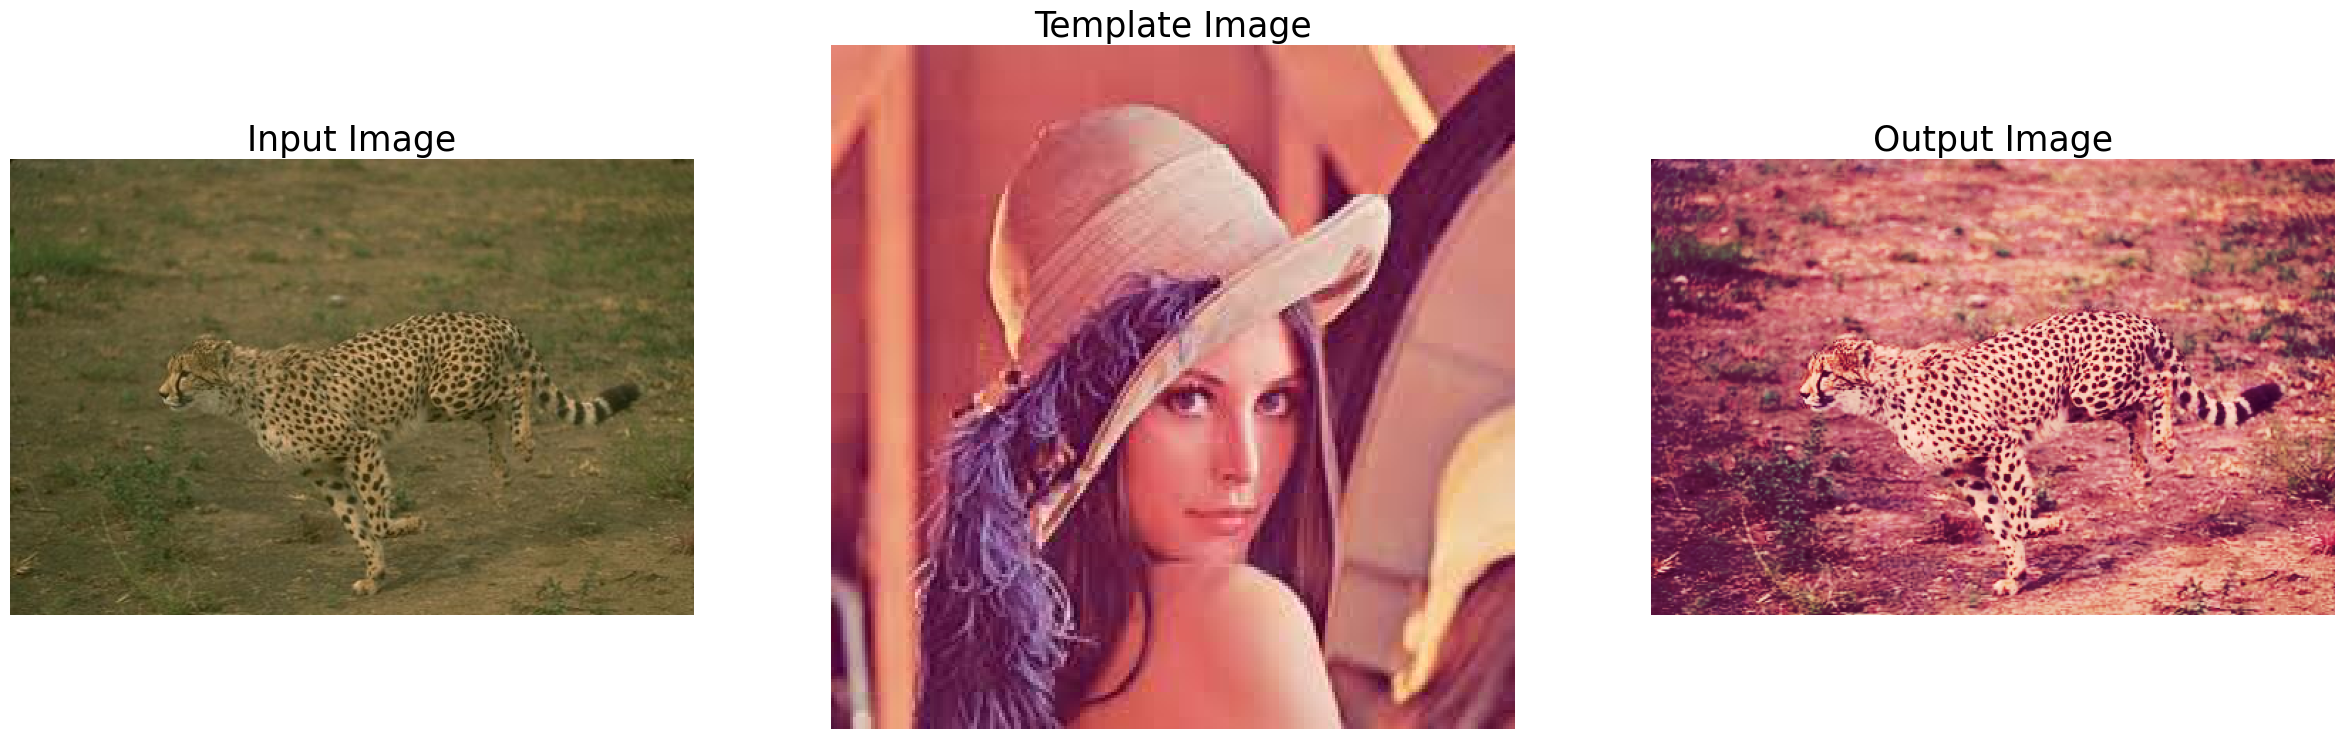

In [3]:
from skimage.exposure import cumulative_distribution
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1,256):
        c = np.append(c, 1)
    return c

im = imread('../images/cheetah.png').astype(np.uint8)
im_t = imread('../images/lena.jpg')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(132), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(133), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

Floyd-Steinberg Dithering

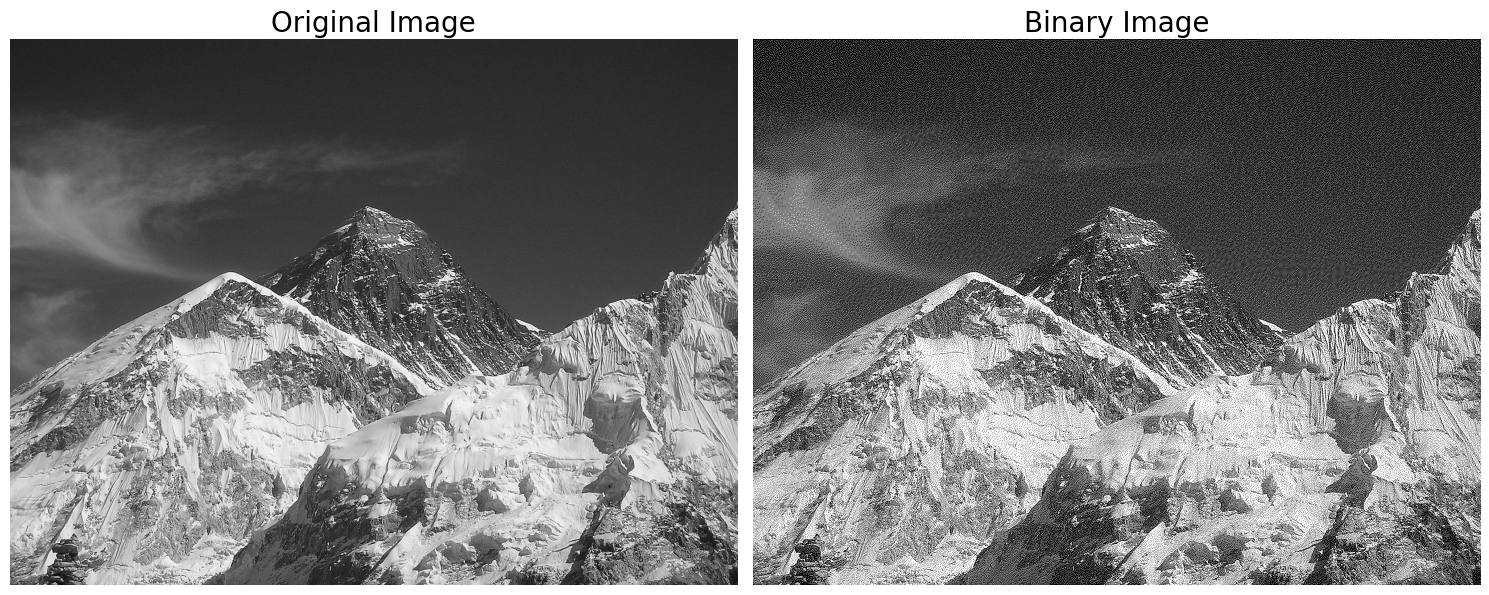

In [4]:
def find_closest_palette_color(oldpixel):
  return int(round(oldpixel / 255)*255)

im = rgb2gray(imread('../images/hill.jpg'))*255
pixel = np.copy(im)
w, h = im.shape

for y in range(h):
  for x in range(w):
    oldpixel = pixel[x][y]
    newpixel = find_closest_palette_color(oldpixel)
    pixel[x][y] = newpixel
    quant_error = oldpixel - newpixel

    if x < w-1:
      pixel[x + 1][y] = pixel[x + 1][y] + quant_error * 7 / 16
    if x > 0 and y < h-1:
      pixel[x - 1][y + 1] = pixel[x - 1][y + 1] + quant_error * 3 / 16
    if y < h-1:
      pixel[x][y + 1] = pixel[x][y + 1] + quant_error * 5 / 16
    if x < w-1 and y < h-1:
      pixel[x + 1][y + 1] = pixel[x + 1][y + 1] + quant_error * 1 / 16

plt.figure(figsize=(15,20))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Image', size=20)
plt.subplot(122)
plt.imshow(pixel, cmap='gray')
plt.axis('off')
plt.title('Binary Image', size=20)
plt.tight_layout()
plt.show()